### PartA

In [ ]:
# Install libraries

!pip -q install roboflow
!pip -q install ultralytics
!pip -q install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
###### libraries ######

from PIL import Image
import matplotlib.pyplot as plt

from roboflow import Roboflow
from ultralytics import YOLO

from openai import OpenAI


In [ ]:
# Create roboflow object to use food dataset
rf = Roboflow(api_key="VwcjjC2TFA9MUPQ0y7Z8")
project = rf.workspace("calorie-xclip").project("-970ur")
dataset = project.version(4).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.6, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to 음식-이미지-분류-4 in yolov8:: 100%|██████████| 5500/5500 [00:02<00:00, 2531.53it/s]


### PartB

In [ ]:
# Load a model
model = YOLO('yolov8n.pt')
model.train(data="/content/음식-이미지-분류-4/data.yaml", epochs=20,
            device=0, half=False)

Ultralytics YOLOv8.1.6 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/음식-이미지-분류-4/data.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

100%|██████████| 755k/755k [00:00<00:00, 104MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/음식-이미지-분류-4/train/labels... 2139 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2139/2139 [00:01<00:00, 2055.41it/s]

train: New cache created: /content/음식-이미지-분류-4/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/음식-이미지-분류-4/valid/labels... 403 images, 0 backgrounds, 0 corrupt: 100%|██████████| 403/403 [00:00<00:00, 959.88it/s]

val: New cache created: /content/음식-이미지-분류-4/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.43G     0.7439      2.939      1.314         27        640: 100%|██████████| 134/134 [00:49<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.25it/s]

                   all        403        403       0.57      0.673       0.66      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.32G      0.713      1.791      1.249         22        640: 100%|██████████| 134/134 [00:43<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.03it/s]

                   all        403        403      0.565      0.647      0.667      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.32G     0.7294      1.577      1.248         33        640: 100%|██████████| 134/134 [00:44<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.12it/s]

                   all        403        403       0.77      0.749      0.828      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.31G     0.7187       1.34      1.236         26        640: 100%|██████████| 134/134 [00:44<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]

                   all        403        403      0.716      0.817      0.848      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.31G     0.6882      1.231      1.207         21        640: 100%|██████████| 134/134 [00:43<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.17it/s]

                   all        403        403      0.791      0.764      0.846      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.31G      0.667      1.097      1.208         24        640: 100%|██████████| 134/134 [00:42<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.68it/s]

                   all        403        403       0.82      0.773      0.857      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.31G     0.6593     0.9975      1.192         24        640: 100%|██████████| 134/134 [00:42<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.54it/s]


                   all        403        403      0.812      0.721      0.823      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.31G      0.638     0.9444       1.17         24        640: 100%|██████████| 134/134 [00:42<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.71it/s]

                   all        403        403      0.837      0.859      0.918      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.31G     0.6048     0.8863      1.161         25        640: 100%|██████████| 134/134 [00:42<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.04it/s]

                   all        403        403      0.895      0.869      0.935      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.31G     0.5869     0.8185      1.142         15        640: 100%|██████████| 134/134 [00:44<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.15it/s]

                   all        403        403      0.906      0.843      0.936      0.776


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.43G     0.4921     0.7932      1.141         11        640: 100%|██████████| 134/134 [00:43<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.13it/s]


                   all        403        403      0.889      0.903      0.952      0.821

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20       2.3G     0.4595      0.676      1.109         11        640: 100%|██████████| 134/134 [00:40<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.45it/s]


                   all        403        403      0.923      0.928      0.956      0.823

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20       2.3G     0.4434     0.6219      1.096         11        640: 100%|██████████| 134/134 [00:41<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.49it/s]

                   all        403        403      0.891       0.91      0.946      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20       2.3G     0.4282     0.5935      1.073         11        640: 100%|██████████| 134/134 [00:40<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.07it/s]

                   all        403        403      0.926      0.919      0.962      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20       2.3G     0.4036     0.5061       1.05         11        640: 100%|██████████| 134/134 [00:42<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.09it/s]

                   all        403        403      0.923      0.944      0.965       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20       2.3G     0.3955     0.4725      1.054         11        640: 100%|██████████| 134/134 [00:41<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.62it/s]

                   all        403        403      0.935      0.936      0.968      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20       2.3G     0.3776      0.438      1.023         11        640: 100%|██████████| 134/134 [00:40<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.13it/s]

                   all        403        403      0.953      0.899      0.968      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20       2.3G     0.3588     0.4256       1.01         11        640: 100%|██████████| 134/134 [00:41<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.22it/s]

                   all        403        403      0.935      0.929      0.964      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20       2.3G     0.3474     0.3935          1         11        640: 100%|██████████| 134/134 [00:40<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.60it/s]


                   all        403        403      0.952      0.925       0.97      0.861

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20       2.3G     0.3337     0.3663     0.9878         11        640: 100%|██████████| 134/134 [00:40<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.43it/s]

                   all        403        403      0.935      0.947      0.974      0.871



20 epochs completed in 0.269 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.6 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.49it/s]


                   all        403        403      0.955      0.933      0.974      0.872
      Beef_radish_soup        403         38      0.971      0.892      0.985      0.853
Black_bean_sauce_noodles        403         41      0.975      0.959      0.981      0.928
      Chicken_porridge        403         37      0.943      0.902      0.988       0.93
            Curry_Rice        403         41      0.904          1      0.984       0.91
Marinated_seasoning_crab        403         39       0.97      0.974       0.98      0.856
           Pork_cutlet        403         40      0.943       0.82      0.903      0.754
      Seasoned_spinach        403         38      0.995          1      0.995      0.846
         Smoked_salmon        403         48      0.956      0.938       0.96      0.776
          Steamed_rice        403         43      0.927          1      0.995      0.943
  Stir-fried_Rice_Cake        403         38       0.97      0.846      0.973      0.922
Speed: 0.3ms prep

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7db6f31c2560>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

### PartC

Validation and test results

In [ ]:
# Validation metrics..
val = model.val()

# Obtain 3 general metrics and the list of metrics
val_map = val.box.map
val_map50 = val.box.map50
val_map75 = val.box.map75
all_val_maps = val.box.maps

print("Validation metrics...")
print("The map50-95 result: ", val_map)
print("The map50 result: ", val_map50)
print("The map75 result: ", val_map75)

Ultralytics YOLOv8.1.6 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/음식-이미지-분류-4/valid/labels.cache... 403 images, 0 backgrounds, 0 corrupt: 100%|██████████| 403/403 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.31it/s]


                   all        403        403      0.935      0.947      0.974      0.872
      Beef_radish_soup        403         38       0.92      0.904      0.985      0.853
Black_bean_sauce_noodles        403         41      0.975      0.969      0.982      0.928
      Chicken_porridge        403         37      0.944      0.916      0.988      0.925
            Curry_Rice        403         41      0.892          1      0.984       0.91
Marinated_seasoning_crab        403         39      0.963      0.974       0.98       0.86
           Pork_cutlet        403         40       0.88      0.825      0.903       0.75
      Seasoned_spinach        403         38      0.978          1      0.995      0.847
         Smoked_salmon        403         48      0.921      0.958       0.96      0.781
          Steamed_rice        403         43      0.923          1      0.995      0.943
  Stir-fried_Rice_Cake        403         38      0.952      0.921      0.973      0.926
Speed: 0.5ms prep

In [ ]:
# Test metrics..
test = model.val(split="test", half=False)

# Obtain 3 general metrics and the list of metrics
test_map = test.box.map
test_map50 = test.box.map50
test_map75 = test.box.map75
all_test_maps = test.box.maps

print("Test metrics...")
print("The map50-95 result: ", test_map)
print("The map50 result: ", test_map50)
print("The map75 result: ", test_map75)

# Compute the total time execution of one frame
speed_per_frame = sum([test.speed[key]
                       for key in list(test.speed.keys())])

# Compute fps
fps = 1000 / speed_per_frame

print("FPS is:", fps)

Ultralytics YOLOv8.1.6 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/음식-이미지-분류-4/test/labels... 202 images, 0 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:00<00:00, 2162.16it/s]

val: New cache created: /content/음식-이미지-분류-4/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.31it/s]


                   all        202        203      0.923      0.925      0.967      0.879
      Beef_radish_soup        202         29      0.928      0.884      0.966      0.917
Black_bean_sauce_noodles        202         21      0.969          1      0.995      0.968
      Chicken_porridge        202         29          1      0.841      0.986      0.928
            Curry_Rice        202         18      0.841      0.944       0.96      0.938
Marinated_seasoning_crab        202         18      0.835      0.833      0.907      0.775
           Pork_cutlet        202         22      0.947       0.81      0.921      0.806
      Seasoned_spinach        202         18      0.971      0.944       0.99      0.794
         Smoked_salmon        202         15          1      0.992      0.995      0.805
          Steamed_rice        202         18      0.883          1      0.992      0.955
  Stir-fried_Rice_Cake        202         15      0.853          1       0.96      0.902
Speed: 0.5ms prep

### PardD


image 1/1 /content/test.jpg: 640x512 1 Marinated_seasoning_crab, 121.5ms
Speed: 7.4ms preprocess, 121.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 512)

food_name: Marinated_seasoning_crab


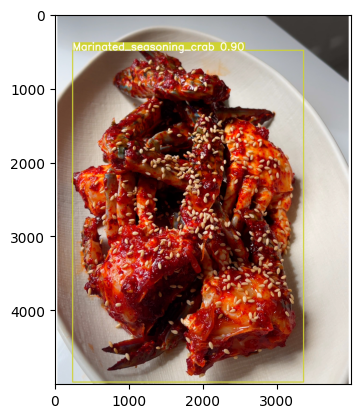

In [ ]:
# Run inference on test.jpg
results = model('/content/test.jpg')

# Show the results
for r in results:
    # Apply plot function on a results object
    im_array = r.plot()
    # Convert to RGB image
    img = Image.fromarray(im_array[..., ::-1])
    plt.imshow(img)

    # Save the name of the food
    food_name = r.names[int(r.boxes.cls)]


print("\nfood_name:", food_name)

### PartE

In [ ]:
# Set your OpenAI API key
your_api_key = None
client = OpenAI(
    # defaults to os.environ.get("OPENAI_API_KEY")
    api_key= your_api_key
)

# Configure function to get the prompt from user
def chat_gpt(food_name):
    # Generate the question regarding the food_name
    # Also configure the model and query
    message = f"What is the recipe of {food_name}"
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": message}]
    )
    return response.choices[0].message.content.strip()

response = chat_gpt(food_name)

print("Response of ChatGPT:\n", response)

Response of ChatGPT:
 Here's a recipe for marinated seasoning crab:

Ingredients:
- 2 lbs (900g) live crabs
- 2 tablespoons soy sauce
- 1 tablespoon oyster sauce
- 1 tablespoon sesame oil
- 1 tablespoon rice vinegar
- 1 tablespoon sugar
- 2 garlic cloves, minced
- 1-inch piece of ginger, grated
- 1 tablespoon cornstarch
- 2 green onions, sliced
- Fresh cilantro (optional), for garnish
- Chili flakes (optional), for garnish

Instructions:
1. Bring a large pot of water to a boil and cook the live crabs for about 10 minutes, until they turn red. Remove from heat and let them cool.
2. Once cooled, clean the crabs and remove the shell. Cut the crabs into pieces, cracking the claws slightly.
3. In a bowl, whisk together soy sauce, oyster sauce, sesame oil, rice vinegar, sugar, garlic, ginger, and cornstarch to make the marinade.
4. Place the crab pieces into a shallow dish or ziplock bag and pour the marinade over them. Toss to coat evenly and marinate for at least 30 minutes or up to overni